In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# 1.Download the Dataset and Understand the Format (10 Points)

# 2.Generate the Data Matrix and the Label vector (10 Points)

In [5]:
path = os.path.abspath(os.curdir)
path

'C:\\Users\\SourcesNet'

In [8]:
x_features = []
y_labels = []

folder_path = path + '\\pca_lda_dataset'

for i in tqdm(os.listdir(folder_path)) :
    class_path = folder_path + '\\' + i
    for j in os.listdir(class_path) :
        img = plt.imread(os.path.join(class_path, j))
        x_features.append(img)
        y_labels.append(i)
        

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 23.56it/s]


In [10]:
x_features[0]

array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ...,
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)

s1


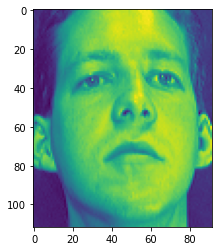

In [14]:
plt.imshow(x_features[9])
print(y_labels[9])

In [20]:
x_features[0].shape

(112, 92)

In [19]:
type(x_features[0])

numpy.ndarray

In [22]:
z = x_features[0].reshape(-1)
z

array([48, 49, 45, ..., 47, 46, 46], dtype=uint8)

### a.Convert every image into a vector of 10304 values corresponding to the image size.
### b.Stack the 400 vectorsinto a single Data Matrix D and generate the label vector y.The labels are integers from 1:40 corresponding to the subject id.

In [23]:
for i in range(len(x_features)) :
    x_features[i] = x_features[i].reshape(-1) # we can use .ravel() also

In [25]:
x_features[0].shape

(10304,)

In [26]:
len(x_features)

400

## 3.Split the Dataset into Training and Test sets (10 Points)
### a.From the Data Matrix D400x10304 keep the odd rows for training and the even rows for testing. 
### This will give you 5 instances per person for training and 5 instancesper person for testing.
### b.Split the labels vector accordingly.

In [47]:
x_train = []
y_train = []
x_test = []
y_test = []

for i in range(len(x_features)) :
    if i % 2 == 0 :
        x_train.append(x_features[i])
        y_train.append(y_labels[i])
    else :
        x_test.append(x_features[i])
        y_test.append(y_labels[i])

In [48]:
len(x_train)
print(x_train[0] == x_features[0])
print(x_train[60] == x_features[120])
print(y_train[0] == y_labels[0])
print(y_train[60] == y_labels[120])

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
True
True


## 4.Classification using PCA(30 points)
### a.Use the pseudo code below for computing the projection matrix U. Define thealpha= {0.8,0.85,0.9,0.95}
### b.Project the training set, andtest sets separately using the same projection matrix.
### c.Use a simple classifier (first Nearest Neighbor to determine the class labels).
### d.Report Accuracy for every value of alpha separately.
### e.Can you find a relation between alpha and classification accuracy?

In [50]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)
# compute the mean
mean1 = x_train[0].mean()
mean1

128.33821816770185

In [55]:
mean = x_train.mean(axis = 1)
mean

matrix([[128.33821817],
        [147.98893634],
        [142.14926242],
        [143.22272904],
        [128.40848214],
        [ 95.10277562],
        [ 97.07230202],
        [102.80706522],
        [108.88848991],
        [104.03018245],
        [100.02309783],
        [101.18410326],
        [107.21127717],
        [ 99.12820264],
        [103.23825699],
        [129.7804736 ],
        [115.89800078],
        [114.25669643],
        [126.85636646],
        [130.1255823 ],
        [125.21477096],
        [125.41527562],
        [128.18565606],
        [131.90799689],
        [130.99446817],
        [106.48913043],
        [105.96224767],
        [106.03018245],
        [102.19604037],
        [101.13082298],
        [111.39343944],
        [114.84501165],
        [109.81677019],
        [112.11898292],
        [108.5306677 ],
        [102.67274845],
        [119.2330163 ],
        [134.37567935],
        [111.39576863],
        [123.41954581],
        [116.37354425],
        [116.159

In [53]:
x_train

matrix([[ 48,  49,  45, ...,  47,  46,  46],
        [ 60,  60,  62, ...,  32,  34,  34],
        [ 63,  53,  35, ...,  41,  10,  24],
        ...,
        [114, 110, 112, ...,  93,  89,  86],
        [113, 112, 111, ...,  87,  87,  89],
        [111, 114, 112, ...,  88,  86,  92]], dtype=uint8)

In [56]:
x_train_cen = x_train - mean
x_train_cen

matrix([[ -80.33821817,  -79.33821817,  -83.33821817, ...,  -81.33821817,
          -82.33821817,  -82.33821817],
        [ -87.98893634,  -87.98893634,  -85.98893634, ..., -115.98893634,
         -113.98893634, -113.98893634],
        [ -79.14926242,  -89.14926242, -107.14926242, ..., -101.14926242,
         -132.14926242, -118.14926242],
        ...,
        [  -0.15130047,   -4.15130047,   -2.15130047, ...,  -21.15130047,
          -25.15130047,  -28.15130047],
        [  -1.60461957,   -2.60461957,   -3.60461957, ...,  -27.60461957,
          -27.60461957,  -25.60461957],
        [  -5.30619177,   -2.30619177,   -4.30619177, ...,  -28.30619177,
          -30.30619177,  -24.30619177]])

In [57]:
cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
cov

matrix([[1976.34805901, 1960.26574729, 1969.31129174, ..., 1037.08246264,
         1181.18927893, 1310.84550078],
        [1960.26574729, 1959.59343556, 1962.30398001, ..., 1057.75015092,
         1204.7469672 , 1326.33818906],
        [1969.31129174, 1962.30398001, 1979.05952446, ..., 1048.89569537,
         1203.27251165, 1330.21373351],
        ...,
        [1037.08246264, 1057.75015092, 1048.89569537, ..., 4275.79686627,
         3921.82368256, 3816.33490441],
        [1181.18927893, 1204.7469672 , 1203.27251165, ..., 3921.82368256,
         3962.76549884, 3880.1317207 ],
        [1310.84550078, 1326.33818906, 1330.21373351, ..., 3816.33490441,
         3880.1317207 , 3979.69794255]])

In [58]:
cov.shape

(10304, 10304)

In [59]:
eig_val, eig_vec = np.linalg.eigh(cov)
eig_val

array([-1.47865309e-09, -9.67008802e-10, -9.39322865e-10, ...,
        1.09462153e+06,  2.49586831e+06,  1.03243713e+07])

In [76]:
eig_vec

matrix([[ 4.40999566e-13,  0.00000000e+00,  0.00000000e+00, ...,
         -2.02077162e-02, -1.26709374e-02,  8.58581305e-03],
        [ 2.39118447e-01, -1.18850190e-01,  2.50816148e-01, ...,
         -2.01693608e-02, -1.26069511e-02,  8.63548751e-03],
        [-2.73098009e-01,  2.33758767e-01, -8.76188788e-02, ...,
         -2.03500603e-02, -1.28602767e-02,  8.54150292e-03],
        ...,
        [ 9.26977299e-03, -4.96540431e-03,  1.40951771e-02, ...,
          9.62853691e-03, -2.51121222e-03,  1.28744880e-02],
        [ 6.11347741e-03, -4.87901502e-05, -8.41145974e-04, ...,
          7.10166309e-03, -2.96597121e-03,  1.35954397e-02],
        [-1.43114475e-02, -2.73048956e-03, -9.79261541e-03, ...,
          6.10567764e-03, -4.77243340e-03,  1.41162794e-02]])

In [79]:
fraction = []
eig_sum=0
eig_val_rev = eig_val[::-1]
eig_vec_rev = eig_vec[::-1]

for i in eig_val_rev :
    eig_sum += i
    fraction.append(eig_sum/eig_val_rev.sum())

fraction

[0.43845897501681685,
 0.5444543744512367,
 0.5909411404181314,
 0.6308295538312368,
 0.658097473379042,
 0.6796417634922073,
 0.6957170891616679,
 0.7115391333831456,
 0.7249574730007461,
 0.7365060482623261,
 0.7468920748137782,
 0.7555971594316357,
 0.7640547321320034,
 0.7714085154913087,
 0.7782959154778059,
 0.7847136720397697,
 0.7910789006002039,
 0.7970016962778844,
 0.8026342919383769,
 0.8077631031091668,
 0.8126878824475127,
 0.8173268031073749,
 0.8216538791926572,
 0.8257101613906178,
 0.8296699711286953,
 0.8334950842193756,
 0.8372496353608357,
 0.840827872912628,
 0.8443070606677346,
 0.8476451996054353,
 0.8509397520424923,
 0.8541373760949176,
 0.8571234086152064,
 0.8600644434741815,
 0.8628447842610816,
 0.8655032901022587,
 0.8680618616609646,
 0.8705645480059278,
 0.8730077984337368,
 0.8753988631659732,
 0.8776965243770664,
 0.8799490627343509,
 0.8821733354530112,
 0.8843056121074325,
 0.8863696770077292,
 0.8884117355555555,
 0.8904047170301599,
 0.89237936556

In [80]:
len(fraction)

10304

In [81]:
fraction[10303]

1.0000000000000007

In [82]:
fraction = np.array(fraction)
print(fraction)

[0.43845898 0.54445437 0.59094114 ... 1.         1.         1.        ]


In [83]:
alpha = [0.8, 0.85, 0.9, 0.95]
fraction_trimed = fraction > alpha[0]
fraction_trimed

array([False, False, False, ...,  True,  True,  True])

In [84]:
smallest_ind = 0

for i in range(len(fraction_trimed)) :
    if fraction_trimed[i] == True :
        smallest_ind = i
        break;

smallest_ind

18

In [88]:
proj_mat = eig_vec_rev[:smallest_ind+1]
proj_mat

matrix([[-1.43114475e-02, -2.73048956e-03, -9.79261541e-03, ...,
          6.10567764e-03, -4.77243340e-03,  1.41162794e-02],
        [ 6.11347741e-03, -4.87901502e-05, -8.41145974e-04, ...,
          7.10166309e-03, -2.96597121e-03,  1.35954397e-02],
        [ 9.26977299e-03, -4.96540431e-03,  1.40951771e-02, ...,
          9.62853691e-03, -2.51121222e-03,  1.28744880e-02],
        ...,
        [ 5.02321565e-03, -7.07822858e-03, -1.24872236e-03, ...,
          1.75339931e-02, -9.88204091e-03,  9.64316213e-03],
        [-3.49250542e-03, -9.80585753e-04,  6.38016881e-03, ...,
          1.79483112e-02, -8.50801606e-03,  9.31191296e-03],
        [ 4.26091060e-03, -2.86357337e-03, -5.19720200e-03, ...,
          1.34014312e-02, -7.67041412e-03,  9.26949872e-03]])